# Installs

In [ ]:
!pip install bioinfokit

     |████████████████████████████████| 81kB 3.5MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-1.0.3-cp36-none-any.whl size=53154 sha256=5b382c0fd1f689daf6805a1dc52c483f015187ef8ab611dbcacda103e6fc1fb6
  Stored in directory: /root/.cache/pip/wheels/33/d9/cf/d9ffa70018b3517956075001cf614bb98c885d8530b96c9f2c
  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=774c1b345382741ac87a1158a557c3aa058302b5d89f212aa40633a89c6da50c
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [ ]:
import bioinfokit
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from bioinfokit import analys, visuz

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
bioinfokit.__version__

'1.0.3'

# Import

In [ ]:
df = pd.read_csv('probes.csv',sep=';', index_col='Num')

In [ ]:
df.head()

,Hybridization REF,position,gene,chrome,p_vals,mean_cebpa_mut,mean_no_cebpa_mut,mean_cebpa - mean_no_cebpa,site_status,fdr
Num,,,,,,,,,,
1,cg00000029,53468112,RBL2,16,2.760000e-06,0.734078,0.529800,0.204278,no_peak_site,1.721760e-04
2,cg00000236,42263294,VDAC3,8,5.090000e-14,0.892625,0.767645,0.124981,no_peak_site,5.850000e-11
3,cg00000289,69341139,ACTN1,14,4.850044e-02,0.835965,0.794356,0.041609,no_peak_site,2.426926e-01
4,cg00000292,28890100,ATP2A1,16,1.872712e-02,0.852422,0.806690,0.045732,no_peak_site,1.346666e-01
5,cg00000321,41167802,SFRP1,8,3.752884e-02,0.575149,0.458682,0.116468,no_peak_site,2.086038e-01


In [ ]:
x = pd.to_numeric(df['mean_cebpa - mean_no_cebpa'])
y = pd.to_numeric(df['p_vals'])
a = pd.to_numeric(df['fdr'])
b = df['site_status']
z = pd.concat([x,y,a,b], axis=1)

In [ ]:
z.columns = ['delta','p_vals','fdr','site']
z = z.dropna()
z['log'] = np.log10(z['p_vals'])*-1


In [ ]:
def statuser(s):
    if (s['log'] > 2) and (s['delta'] > 0.1):
        return 'Hypermethylation'
    if (s['log'] > 2) and (s['delta'] < -0.1):
        return 'Hypomethylation'
    #if  (s['log'] < 2) and (s['delta'] < 0.1):
   #     return 'no change'
    #if  (s['log'] > 2) and (s['delta'] < 0.1):
   #     return 'no change'
    else:
      return 'no change'

In [ ]:
z['status'] = z.apply(statuser, axis=1)

In [ ]:
#visuz.gene_exp.volcano(df=z, lfc='delta', pv='fdr')
z.head(1)

,delta,p_vals,fdr,site,log,status
Num,,,,,,
1,0.204278,0.000003,0.000172,no_peak_site,5.559091,Hypermethylation


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, '-Log(p-Value)')

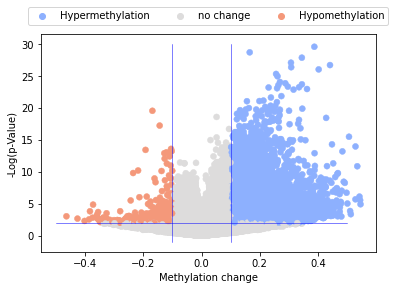

In [ ]:
sns.color_palette("coolwarm", as_cmap=True)

sns.scatterplot(x='delta', y='log', data=z, hue='status', alpha=None, 
                palette='coolwarm', edgecolor=None)
plt.plot([-0.5, 0.5], [2, 2], linewidth=0.5, color='b')
plt.plot([0.1, 0.1], [-1, 30], linewidth=0.5, color='b')
plt.plot([-0.1, -0.1], [-1, 30], linewidth=0.5, color='b')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.xlabel('Methylation change')
plt.ylabel('-Log(p-Value)')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 'peak_site' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 'no_peak_site' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
No handles with labels found to put in legend.


Text(0, 0.5, '-Log(p-Value)')

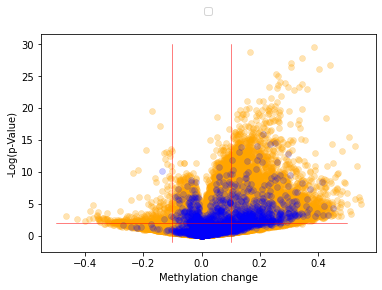

In [ ]:
sns.color_palette("coolwarm", as_cmap=True)

z["alpha"] = np.where(z.site == "peak_site", 0.2, 0.3)

ax = sns.scatterplot(x='delta', y='log', data=z[z.alpha == 0.3], alpha=0.3,
                     edgecolor = None, color='orange')
sns.scatterplot(x='delta', y='log', data=z[z.alpha == 0.2], 
                alpha=0.2, ax=ax, edgecolor = None, color='b')

plt.legend(('peak_site', 'no_peak_site'), ('cebpa', 'non cebpa'))
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.plot([-0.5, 0.5], [2, 2], linewidth=0.5, color='r')
plt.plot([0.1, 0.1], [-1, 30], linewidth=0.5, color='r')
plt.plot([-0.1, -0.1], [-1, 30], linewidth=0.5, color='r')
plt.xlabel('Methylation change')
plt.ylabel('-Log(p-Value)')